# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [1]:
# Read in the customer data
import pandas as pd

customers=pd.read_csv('../Data/maven_music_customers.csv')
listening_history=pd.read_excel('../Data/maven_music_listening_history.xlsx')
audio_files=pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=1)
session_login_time=pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=2)

In [2]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [3]:
# Read in the listening history
listening_history.head()
#listening_history.info()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [36]:
# Read in the audio data
audio_files.head()
audio_files['ID']=audio_files['ID'].str.replace('Song-','')
audio_files['ID']=audio_files['ID'].str.replace('Podcast-','')
audio_files.head()

,ID,Name,Genre,Popularity
0,101,Dance All Night,Pop,1
1,102,Unbreakable Beat,Pop,2
2,103,Sunset Boulevard,Pop,5
3,104,Glowing Hearts,Pop,10
4,105,Pop Rocks,Pop,52


In [4]:
# Read in the session data
session_login_time.head()
#session_login_time.info()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [5]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [6]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [7]:
customers['Email']=customers['Email'].str.replace('Email: ','')
customers['Subscription Rate']=customers['Subscription Rate'].astype('string').str.replace('$','')

In [8]:
# Convert objects to numeric and datetime fields
customers['Member Since']=pd.to_datetime(customers['Member Since'])
customers['Cancellation Date']=pd.to_datetime(customers['Cancellation Date'])
customers['Subscription Rate']=customers['Subscription Rate'].astype(float)

C:\Users\bhavy\AppData\Local\Temp\ipykernel_20440\693333668.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since']=pd.to_datetime(customers['Member Since'])
C:\Users\bhavy\AppData\Local\Temp\ipykernel_20440\693333668.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date']=pd.to_datetime(customers['Cancellation Date'])


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [9]:
# Look for NaN values in the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [10]:
customers[customers['Subscription Rate']==2.99]
customers['Subscription Plan'].fillna('Basic (Ads)',inplace=True)


In [11]:
import numpy as np
customers['Discount?']=np.where(customers['Discount?']=='Yes',1,0)

#### ii. Inconsistent Text & Typos

In [12]:
# Look for inconsistent text & typos
#customers
#listening_history
#audio_files
#session_login_time
audio_files.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [13]:

customers[customers['Subscription Rate']>7.99]
#customers.iloc[15,5]=9.99

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [14]:
audio_files.Genre=np.where(audio_files['Genre']=='Pop Music','Pop',audio_files.Genre)

#### iii. Duplicate Rows

In [15]:
# Look for duplicate rows
#customers
#listening_history
#audio_files
#session_login_time
session_login_time[session_login_time.duplicated()]

,Session ID,Session Log In Time


#### iv. Outliers

In [16]:
# Look for outliers
#customers
#listening_history
#audio_files
#session_login_time
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [17]:
# Create a 'Cancelled' column
customers['Cancelled']=np.where(customers['Cancellation Date'].notna(),1,0)
#customers

In [18]:
# Create an updated 'Email' column without the Email: portion


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [19]:
# How long were customers members before they cancelled?
customers.head()
(customers['Cancellation Date']-customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [86]:
# Cancellation rate for those who had a discount
discount_yes=customers[customers['Discount?']==1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [26]:
with_discount=discount_yes.Cancelled.sum()/discount_yes.Cancelled.count()
with_discount

0.8571428571428571

In [25]:
# Cancellation rate for those who did not have a discount
discount_no=customers[customers['Discount?']==0]
without_discount=discount_no.Cancelled.sum()/discount_no.Cancelled.count()
without_discount

0.30434782608695654

In [32]:
pd.DataFrame([['Had Discount',with_discount],
              ['Did Not have Discount',with_discount]],
             columns=['Customer Type','Cancellation Rate'])

,Customer Type,Cancellation Rate
0,Had Discount,0.857143
1,Did Not have Discount,0.857143


<Axes: ylabel='Customer Type'>

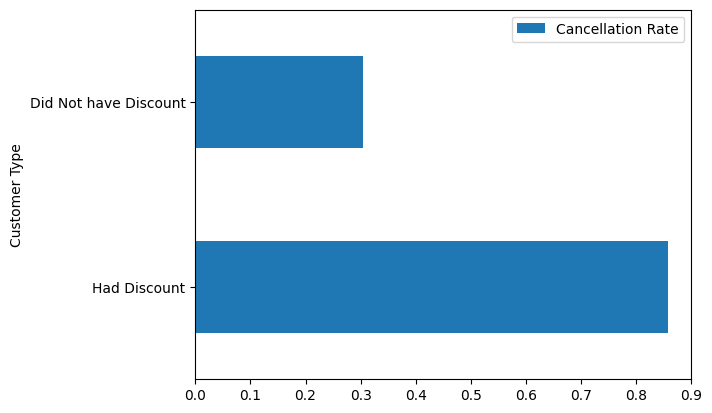

In [33]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount',with_discount],
              ['Did Not have Discount',without_discount]],
             columns=['Customer Type','Cancellation Rate']).plot.barh(x='Customer Type',y='Cancellation Rate',)

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [ ]:
# Split the ID in the audio data so the column can be joined with other tables
#customers
#listening_history
#audio_files
#session_login_time
audio_files.ID=audio_files.ID.astype('Int64')
Combined_listening_history=listening_history.merge(audio_files,how='left',left_on='Audio ID',right_on='ID')
#audio_files

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,108,Chase the Dream,Hip Hop,4


In [78]:
Combined_listening_history[Combined_listening_history['Customer ID']==5001].nunique()

Customer ID     1
Session ID      8
Audio Order    12
Audio ID        8
Audio Type      1
ID              8
Name            8
Genre           2
Popularity      8
dtype: int64

In [139]:
# The number of listening sessions that each customer had in the past 3 months
#Combined_listening_history.groupby('Customer ID')['Session ID'].nunique().plot.hist()
No_Of_Sessions=Combined_listening_history.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
No_Of_Sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [135]:
# The most popular genres that customers listened to
Combined_listening_history['Genre'].count()

505

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [130]:
# Create a dataframe ready for modeling
#customers
#listening_history
#audio_files
#session_login_time
#Combined_listening_history
model_df=customers[['Customer ID','Cancelled','Discount?']]
#pd.get_dummies(customers['Cancelled'],drop_first=True).astype(int)
No_Of_Sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [129]:
# Calculate the number of listening sessions for each customer
model_df=model_df.merge(No_Of_Sessions,how='left').head()
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [177]:
# Percent pop
Combined_listening_history.head()
genres=pd.concat((Combined_listening_history['Customer ID'],pd.get_dummies(Combined_listening_history.Genre).astype(int)),axis=1).groupby('Customer ID').sum().reset_index()
genres
#model_df.merge(genres,how='left').head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0
5,5404,0,0,0,0,8,0
6,5581,0,0,0,0,0,5
7,5759,0,0,0,0,15,0
8,5761,0,0,0,0,0,5
9,5763,0,0,11,0,20,0


In [179]:
# Percent podcasts
Total_audio=Combined_listening_history.groupby(Combined_listening_history['Customer ID'])['Audio ID'].count().rename('Total Audio').reset_index()
genres=genres.merge(Total_audio,how='left')
genres

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [183]:
model_df['Percent Pop']=(genres.Pop/genres['Total Audio'])*100
model_df.head()

C:\Users\bhavy\AppData\Local\Temp\ipykernel_20440\848658956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Percent Pop']=(genres.Pop/genres['Total Audio'])*100


,Customer ID,Cancelled,Discount?,Percent Pop
0,5001,0,0,56.666667
1,5002,0,0,0.000000
2,5004,1,0,100.000000
3,5267,0,0,51.111111
4,5338,0,0,0.000000


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [184]:
import seaborn as sns

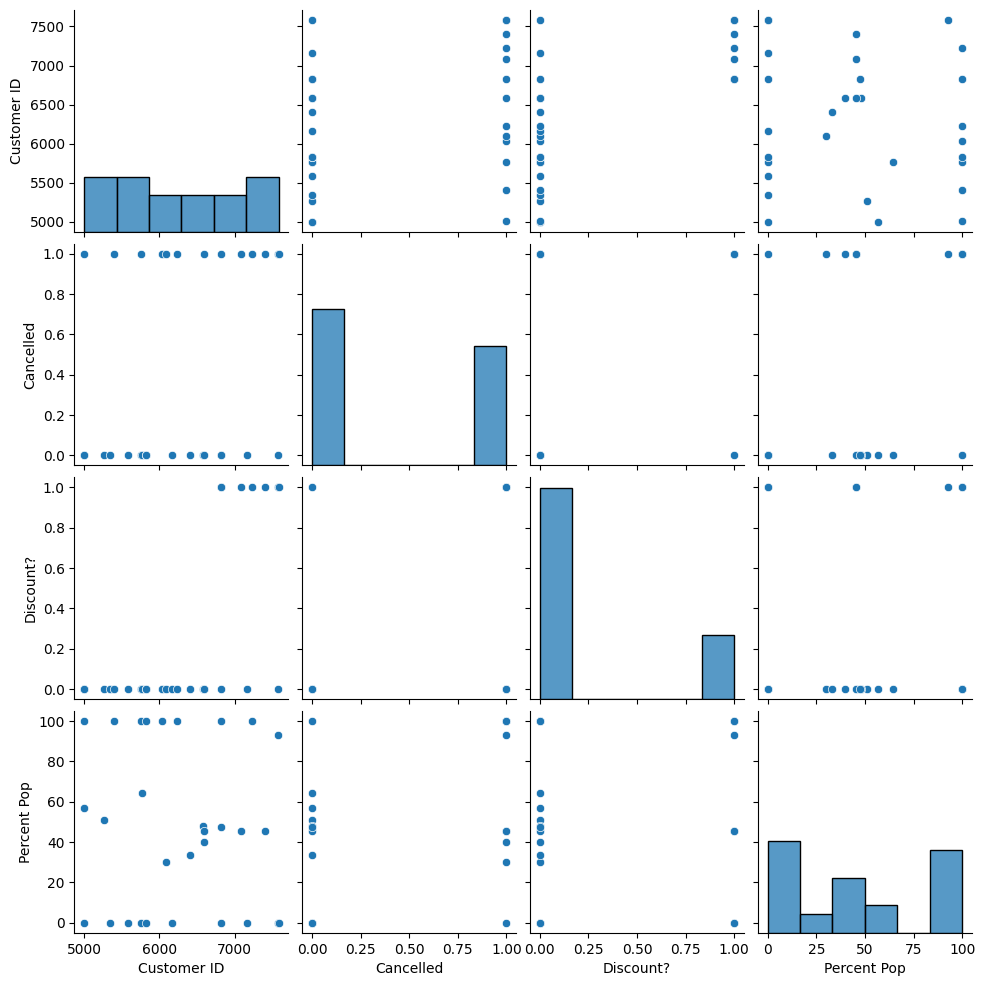

In [185]:
sns.pairplot(model_df)

In [187]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Percent Pop
Customer ID,1.000000,0.269942,0.648514,-0.076129
Cancelled,0.269942,1.000000,0.471825,0.585630
Discount?,0.648514,0.471825,1.000000,0.112675
Percent Pop,-0.076129,0.585630,0.112675,1.000000
